## Overview parametrizations

Visualize some of the parametrizations implemented in to the `analytic formulas` module.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

import analytic_formulas as af

In [3]:
%matplotlib inline

In [4]:
    
print('-- -15 -------------------------')
factors = af.get_factors(af.T0-15, 800e2, verbose=True)  

print('-- -35 -------------------------')
factors = af.get_factors(af.T0-35, 800e2, verbose=True)  

print(factors.__dict__.keys())

-- -15 -------------------------
input kwargs:  {}
mv  0.0012897089110441551
weigth of adiabatic blob  1.0012897089110442
gas constant moist air  287.2654071063962
qv 0.0012897089110441551 0.0012897089110441551
cpt vs cp 1006.0884003102534 1004.1254128928664
rho_air (with Rt) 1.078784075066832 
 Ra 1.0796231760348955
-- -35 -------------------------
input kwargs:  {}
mv  0.00017396516243797628
weigth of adiabatic blob  1.000173965162438
gas constant moist air  287.07228918860704
qv 0.00017396516243797626 0.00017396516243797628
cpt vs cp 1005.1469749937315 1003.1518037403949
rho_air (with Rt) 1.1701677606005747 
 Ra 1.170290669298376
dict_keys(['T', 'p', 'Lw_param', 'Lw', 'Li_param', 'Li', 'D_param', 'D', 'k_param', 'k', 'Ew_param', 'Ew', 'Ei_param', 'Ei', 'rho_w_param', 'rho_w', 'eta_a_param', 'eta_a', 'e0', 'Rt', 'cp_d_param', 'cp_v_param', 'cp', 'mv', 'rho_a', 'rho_dry', 'ksi', 'nu_a', 'upsilon_w', 'upsilon_i', 'a0', 'a1', 'a2', 'a3', 'Aw', 'Ai', 'Aw_alt', 'Ai_alt', 'Bi_s', 'Bi', 'Bi

dict_keys(['LF', 'M', 'AB', 'GG'])


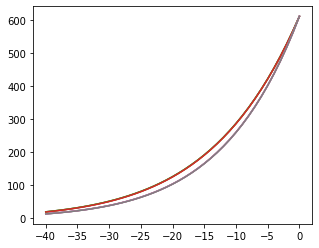

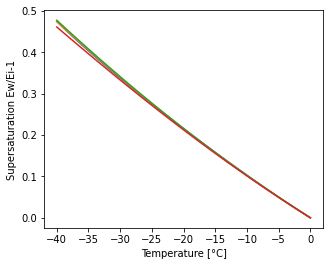

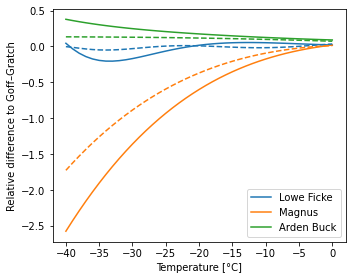

In [27]:
T = np.arange(-40,1,1)+273.15

print(af.pstore['Ei'].keys())

Ei_LF = af.pstore['Ei']['LF'](T)
Ew_LF = af.pstore['Ew']['LF'](T)

Ei_M = af.pstore['Ei']['M'](T)
Ew_M = af.pstore['Ew']['M'](T)

Ei_AB = af.pstore['Ei']['AB'](T)
Ew_AB = af.pstore['Ew']['AB'](T)

Ei_GG = af.pstore['Ei']['GG'](T)
Ew_GG = af.pstore['Ew']['GG'](T)


fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(T-273.15, Ew_LF)
ax.plot(T-273.15, Ew_GG)
ax.plot(T-273.15, Ew_AB)
ax.plot(T-273.15, Ew_M)

ax.plot(T-273.15, Ei_LF)
ax.plot(T-273.15, Ei_GG)
ax.plot(T-273.15, Ei_AB)
ax.plot(T-273.15, Ei_M)


fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(T-273.15, Ew_LF/Ei_LF-1)
ax.plot(T-273.15, Ew_GG/Ei_GG-1)
ax.plot(T-273.15, Ew_AB/Ei_AB-1)

ax.plot(T-273.15, Ew_M/Ei_M-1)

ax.set_xlabel('Temperature [°C]')
ax.set_ylabel('Supersaturation Ew/Ei-1')


fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(T-273.15, (Ew_LF-Ew_GG)/Ew_GG*100, label='Lowe Ficke')
ax.plot(T-273.15, (Ew_M-Ew_GG)/Ew_GG*100, label='Magnus')
ax.plot(T-273.15, (Ew_AB-Ew_GG)/Ew_GG*100, label='Arden Buck')


ax.plot(T-273.15, (Ei_LF-Ei_GG)/Ei_GG*100, '--', color='C0')
ax.plot(T-273.15, (Ei_M-Ei_GG)/Ei_GG*100, '--', color='C1')
ax.plot(T-273.15, (Ei_AB-Ei_GG)/Ei_GG*100, '--', color='C2')

ax.legend()
ax.set_xlabel('Temperature [°C]')
ax.set_ylabel('Relative difference to Goff–Gratch')

fig.tight_layout()
fig.savefig('plots/saturation_pressure_parametrizations.png', dpi=250)

dict_keys(['k', '?', 'HP', 'VDI', 'fixed'])
<function <lambda> at 0x7ff4b6b99820>


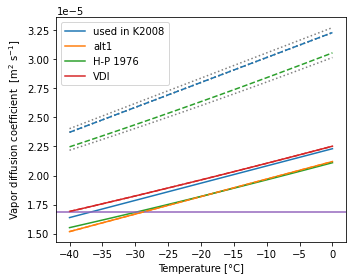

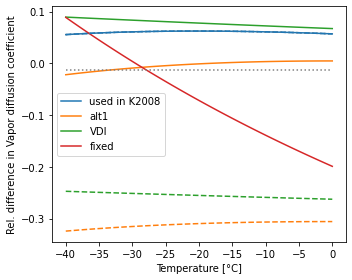

In [28]:
T = np.arange(-40,1,1)+af.T0

print(af.pstore['D'].keys())
print(af.pstore['D']['k'])

p = 1013.25e2
D_k = af.pstore['D']['k'](T, p)
D_d = af.pstore['D']['?'](T, p)
D_HP = af.pstore['D']['HP'](T, p)
D_VDI = af.pstore['D']['VDI'](T, p)
D_fixed = af.pstore['D']['fixed'](T, p)

p = 700e2
D_k_700 = af.pstore['D']['k'](T, p)
D_d_700 = af.pstore['D']['?'](T, p)
D_HP_700 = af.pstore['D']['HP'](T, p)
D_VDI_700 = af.pstore['D']['VDI'](T, p)
D_fixed_700 = af.pstore['D']['fixed'](T, p)

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(T-273.15, D_k, label='used in K2008')
ax.plot(T-273.15, D_d, label='alt1')
ax.plot(T-273.15, D_HP, label='H-P 1976')
ax.plot(T-273.15, D_VDI, label='VDI')
ax.axhline(D_fixed, color='C4')

D_1013 = (2.26e-5+1.5e-7*(T-af.T0))*(1013.25e2/p)
D_1000 = (2.26e-5+1.5e-7*(T-af.T0))*(1000e2/p)
ax.plot(T-273.15, D_1013, ':', color='grey')
ax.plot(T-273.15, D_1000, ':', color='grey')

D_1013 = 0.211*(T/af.T0)**1.94*(1013.25e2/p)*1e-4
D_1013 = 0.211*(T/af.T0)**1.94*(1000e2/p)*1e-4
ax.plot(T-273.15, D_1013, ':', color='grey')
ax.plot(T-273.15, D_1000, ':', color='grey')

ax.plot(T-273.15, D_k_700, '--', color='C0')
ax.plot(T-273.15, D_d_700, '--', color='C1')
ax.plot(T-273.15, D_HP_700, '--', color='C2')
ax.plot(T-273.15, D_VDI_700, '--', color='C3')

ax.legend()

ax.set_xlabel('Temperature [°C]')
ax.set_ylabel('Vapor diffusion coefficient  [m$^2$ s$^{-1}$]')

fig.tight_layout()
fig.savefig('plots/vapor_diffusion_parametrizatons.png', dpi=250)


fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(T-273.15, (D_k-D_HP)/D_HP, label='used in K2008')
ax.plot(T-273.15, (D_d-D_HP)/D_HP, label='alt1')
ax.plot(T-273.15, (D_VDI-D_HP)/D_HP, label='VDI')
ax.plot(T-273.15, (D_fixed-D_HP)/D_HP, label='fixed')


ax.plot(T-273.15, (D_1013-D_HP_700)/D_HP_700, ':', color='grey')
ax.plot(T-273.15, (D_1000-D_HP_700)/D_HP_700, ':', color='grey')


ax.plot(T-273.15, (D_k_700-D_HP_700)/D_HP_700, '--', color='C0')
ax.plot(T-273.15, (D_d_700-D_HP_700)/D_HP_700, '--', color='C1')
ax.plot(T-273.15, (D_VDI_700-D_HP_700)/D_HP_700, '--', color='C2')

ax.legend()

ax.set_xlabel('Temperature [°C]')
ax.set_ylabel('Rel. difference in Vapor diffusion coefficient')

fig.tight_layout()
fig.savefig('plots/vapor_diffusion_parametrizatons_diff.png', dpi=250)

input kwargs:  {}
mv  [8.88930472e-05 1.54630906e-04 2.63114438e-04 4.38344047e-04
 7.15572667e-04 1.14614449e-03 1.80394571e-03 2.79365559e-03
 4.26115682e-03]
weigth of adiabatic blob  [1.00008889 1.00015463 1.00026311 1.00043834 1.00071557 1.00114614
 1.00180395 1.00279366 1.00426116]
gas constant moist air  [287.05754685 287.06893893 287.08773538 287.11808801 287.16608682
 287.24058246 287.35426869 287.52503689 287.77762543]
qv [8.88930472e-05 1.54630906e-04 2.63114438e-04 4.38344047e-04
 7.15572667e-04 1.14614449e-03 1.80394571e-03 2.79365559e-03
 4.26115682e-03] [8.88930472e-05 1.54630906e-04 2.63114438e-04 4.38344047e-04
 7.15572667e-04 1.14614449e-03 1.80394571e-03 2.79365559e-03
 4.26115682e-03]
cpt vs cp [1005.07510795 1005.13064291 1005.22227322 1005.37023843 1005.60422654
 1005.96738334 1006.52158926 1007.35406253 1008.58539956] [1003.07756896 1003.13493247 1003.22959629 1003.3825034  1003.62441587
 1004.00013715 1004.57414107 1005.4377718  1006.71832805]
rho_air (with Rt) 

<ipython-input-29-572b26f97162>:6: RuntimeWarning: divide by zero encountered in true_divide
  Aw = 1.0/((f.rho_w*f.Lw*f.Lw/(f.k*af.Rv*Ts**2))+(f.rho_w*af.Rv*Ts/(f.Ew*f.D)))
<ipython-input-29-572b26f97162>:7: RuntimeWarning: divide by zero encountered in true_divide
  Ai = 1.0/((af.rho_i*f.Li*f.Li/(f.k*af.Rv*Ts**2))+(af.rho_i*af.Rv*Ts/(f.Ei*f.D)))
<ipython-input-29-572b26f97162>:12: RuntimeWarning: divide by zero encountered in true_divide
  rho_v = e0/(af.Rv*Ts)
<ipython-input-29-572b26f97162>:13: RuntimeWarning: divide by zero encountered in true_divide
  kw2 = (f.Lw/(af.Rv*Ts)-1)*f.Lw*rho_v*f.D/(Ts*f.k)
<ipython-input-29-572b26f97162>:14: RuntimeWarning: invalid value encountered in true_divide
  kw1 = f.D*rho_v/(f.rho_w*(kw2+1))
<ipython-input-29-572b26f97162>:16: RuntimeWarning: divide by zero encountered in true_divide
  ki2 = (f.Li/(af.Rv*Ts)-1)*f.Li*rho_v*f.D/(Ts*f.k)
<ipython-input-29-572b26f97162>:17: RuntimeWarning: invalid value encountered in true_divide
  ki1 = c*f.D*rho_

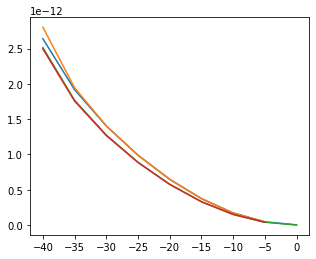

In [29]:
Ts = np.arange(-40,1,5)

params = dict()
f = af.get_factors(273.15+Ts, 900e2, **params, verbose=True)

Aw = 1.0/((f.rho_w*f.Lw*f.Lw/(f.k*af.Rv*Ts**2))+(f.rho_w*af.Rv*Ts/(f.Ew*f.D)))
Ai = 1.0/((af.rho_i*f.Li*f.Li/(f.k*af.Rv*Ts**2))+(af.rho_i*af.Rv*Ts/(f.Ei*f.D)))

c = 1
# different coefficients from the matlab implementation
e0 = f.Ei*(1+0)
rho_v = e0/(af.Rv*Ts)
kw2 = (f.Lw/(af.Rv*Ts)-1)*f.Lw*rho_v*f.D/(Ts*f.k)
kw1 = f.D*rho_v/(f.rho_w*(kw2+1))

ki2 = (f.Li/(af.Rv*Ts)-1)*f.Li*rho_v*f.D/(Ts*f.k)
ki1 = c*f.D*rho_v/(af.rho_i*(ki2+1))

print(Aw)
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(Ts, Aw, label='Aw')
ax.plot(Ts, kw1, label='kw1')

ax.plot(Ts, Ai, label='Ai')
ax.plot(Ts, ki1, label='ki1')

dict_keys(['fixed', 'H'])


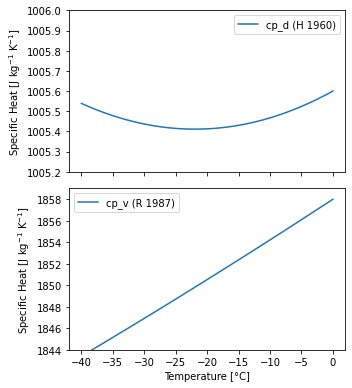

In [30]:
T = np.arange(-40,1,1)+273.15

print(af.pstore['cp_d'].keys())


cp_d = af.pstore['cp_d']['H'](T)
cp_v = af.pstore['cp_v']['R'](T)

fig, ax = plt.subplots(2,1, figsize=(5, 5.5), sharex=True)
ax[0].plot(T-273.15, cp_d, label='cp_d (H 1960)')
ax[0].set_ylim(1005.2, 1006)

ax[1].plot(T-273.15, cp_v, label='cp_v (R 1987)')
ax[1].set_ylim(1844, 1859)

ax[0].legend()
ax[1].legend()

ax[1].set_xlabel('Temperature [°C]')
ax[0].set_ylabel('Specific Heat [J kg$^{-1}$ K$^{-1}$]')
ax[1].set_ylabel('Specific Heat [J kg$^{-1}$ K$^{-1}$]')

fig.tight_layout()
fig.savefig('plots/specific_heat.png', dpi=250)

dict_keys(['k', '?', 'H', 'PK'])


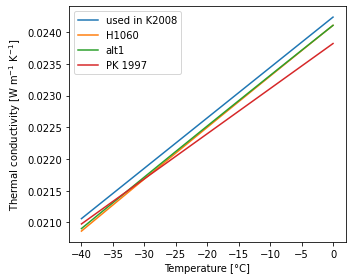

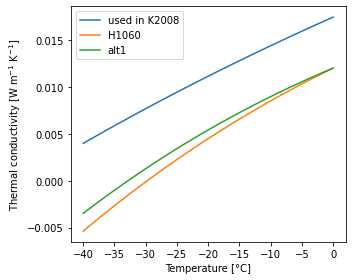

In [31]:

T = np.arange(-40,1,1)+273.15

print(af.pstore['k'].keys())


k_korolev = af.pstore['k']['k'](T)
k_H = af.pstore['k']['H'](T)
k_alt = af.pstore['k']['?'](T)
k_PK = af.pstore['k']['PK'](T)


fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(T-273.15, k_korolev, label='used in K2008')
ax.plot(T-273.15, k_H, label='H1060')
ax.plot(T-273.15, k_alt, label='alt1')
ax.plot(T-273.15, k_PK, label='PK 1997')


ax.legend()

ax.set_xlabel('Temperature [°C]')
ax.set_ylabel('Thermal conductivity [W m$^{-1}$ K$^{-1}$]')

fig.tight_layout()
fig.savefig('plots/thermal conductivity.png', dpi=250)




fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(T-273.15, (k_korolev-k_PK)/k_PK, label='used in K2008')
ax.plot(T-273.15, (k_H-k_PK)/k_PK, label='H1060')
ax.plot(T-273.15, (k_alt-k_PK)/k_PK, label='alt1')


ax.legend()

ax.set_xlabel('Temperature [°C]')
ax.set_ylabel('Thermal conductivity [W m$^{-1}$ K$^{-1}$]')

fig.tight_layout()
# fig.savefig('plots/thermal conductivity.png', dpi=250)

input kwargs:  {}


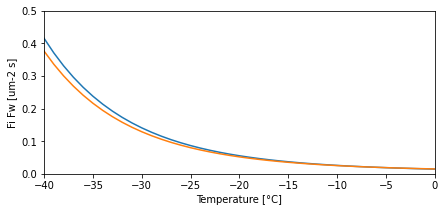

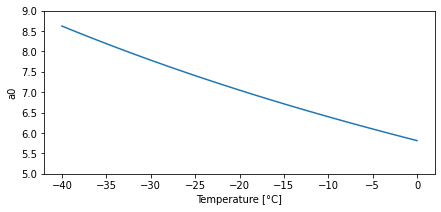

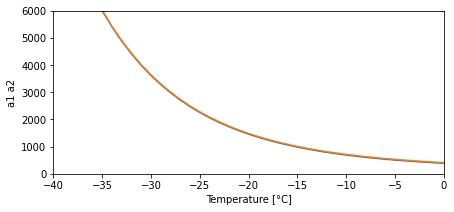

In [32]:

T = np.arange(-40,1,1)+273.15
# a0, a1, a2, Fi, Fw = check_constants(T, 690e2, c=1)
# a0, a1, a2, Fi, Fw = check_constants(T, 1013.25e2, c=1)

params = dict(Li='RY', Lw='RY', rho_w='HS', D='HP')
params = dict()

f = af.get_factors(T, 800e2, **params)
# f = af.get_factors(T, 450e2)
a0, a1, a2 = f.a0, f.a1, f.a2
Fi = 1/f.Ai
Fw = 1/f.Aw

fig, ax = plt.subplots(figsize=(7, 3))

ax.plot(T-273.15, Fw/1e12)
ax.plot(T-273.15, Fi/1e12)
ax.set_ylim(0,0.5)
ax.set_xlim(-40,0)
ax.set_ylabel("Fi Fw [um-2 s]")
ax.set_xlabel('Temperature [°C]')
fig.savefig('plots/P_figC1.png', transparent=True)

fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(T-273.15, a0*1e4)
ax.set_ylim(5,9)
ax.set_ylabel("a0")
ax.set_xlabel('Temperature [°C]')

fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(T-273.15, a1)
ax.plot(T-273.15, a2)
ax.set_ylim(0,6000)
ax.set_xlim(-40,0)
ax.set_ylabel("a1 a2")
ax.set_xlabel('Temperature [°C]')
fig.savefig('plots/P_figC1c.png', transparent=True)



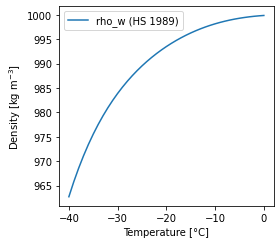

In [33]:
T = np.arange(-40,1,1)+273.15

rho_w = af.pstore['rho_w']['HS'](T)

fig, ax = plt.subplots(1, figsize=(4, 3.5), sharex=True)
ax.plot(T-273.15, rho_w, label='rho_w (HS 1989)')
# ax.set_ylim(1005.2, 1006)


ax.legend()

ax.set_xlabel('Temperature [°C]')
ax.set_ylabel('Density [kg m$^{-3}$]')

fig.tight_layout()
fig.savefig('plots/density_supercooled_water.png', dpi=250)

dict_keys(['k', 'RY', 'FB'])


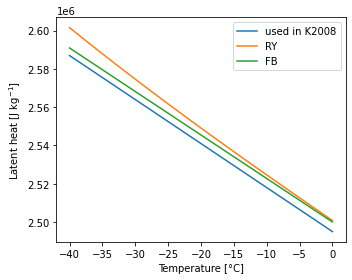

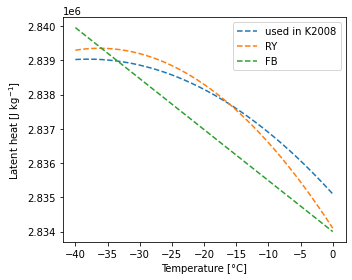

In [34]:

T = np.arange(-40,1,1)+273.15

print(af.pstore['Lw'].keys())
Lw_korolev = af.pstore['Lw']['k'](T)
Lw_RY = af.pstore['Lw']['RY'](T)
Lw_FB = af.pstore['Lw']['FB'](T)

Li_korolev = af.pstore['Li']['k'](T)
Li_RY = af.pstore['Li']['RY'](T)
Li_FB = af.pstore['Li']['FB'](T)


fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(T-273.15, Lw_korolev, label='used in K2008')
ax.plot(T-273.15, Lw_RY, label='RY')
ax.plot(T-273.15, Lw_FB, label='FB')

ax.legend()

ax.set_xlabel('Temperature [°C]')
ax.set_ylabel('Latent heat [J kg$^{-1}$]')

fig.tight_layout()
fig.savefig('plots/Latent_heat_condensation.png', dpi=250)

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(T-273.15, Li_korolev, '--', label='used in K2008')
ax.plot(T-273.15, Li_RY, '--', label='RY')
ax.plot(T-273.15, Li_FB, '--', label='FB')

ax.legend()

ax.set_xlabel('Temperature [°C]')
ax.set_ylabel('Latent heat [J kg$^{-1}$]')

fig.tight_layout()
fig.savefig('plots/Latent_heat_sublimation.png', dpi=250)

In [35]:
# WMO INTERNATIONAL METEOROLOGICAL TABLES

T = np.arange(-40,1,10)+273.15
p = 1013.25e2
p = 1013.25e2

D_wmo = np.array([1.69, 1.82, 1.95, 2.08, 2.22])*1e-5
D    = 21.2e-6 * (1.0 + 0.0071*(T-273.15))
D    = 2.252/(1013.25e2)*(T/273.15)**1.81
D_old = D
# water vapor diffusion in air (Hall-Pruppacher 1976)
D = 0.211*(T/273.15)**1.94*(1013.25e2/p)*1e-4 # converting from cm2 s-1 to m2 s-1
print('D param ', (D-D_old)/D)
print("D wmo", (D_wmo-D)/D)
print("D wmo", (D_wmo-D_old)/D_old)

# wmo table 4.17
k_wmo = np.array([2.07, 2.15, 2.23, 2.32, 2.40])*1e-2
k = (1.5207e-11 * T**3 ) - ( 4.8574e-8 * T**2 ) + ( 1.0184e-4 * T ) - ( 3.9333e-4 )
k_old = k
k = 2.411e-2 * (1+3.309e-3*(T-273.15) - 1.441e-6*(T-273.15)**2)
k = (5.69 + 0.017*(T-273.15))*1e-5*1e2*4.18684
print("k wmo", (k_wmo-k)/k)
print("k wmo", (k_wmo-k_old)/k_old)

for e in zip(T-273.15, k, D):
    print(e)
    
    
print("latent heat")

# WMO Table 4.5
Lw_wmo = np.array([2.6030, 2.5749, 2.5494, 2.5247, 2.50084])*1e6
Li_wmo = np.array([2.8387, 2.8387, 2.8383, 2.8366, 2.8345 ])*1e6

# latent heat of vaporisation, in agreement with the wmo tables
Lw   = 1000.0 * (2500.8 - 2.36*(T-273.15) + 0.0016*(T-273.15)**2 - 0.00006*(T-273.15)**3)
Lw_old = Lw
# Fleagle and Businger (1980. p. 113) less agreement with table
Lw   = (25-0.02274*(T-273.15))*1e5
print("Lw", (Lw_old-Lw)/Lw)
print("Lw wmo", (Lw_wmo-Lw)/Lw)
print("Lw wmo", (Lw_wmo-Lw_old)/Lw_old)
# latent heat of sublimation
Li   = 1000.0 * (2834.1 - 0.29*(T-273.15) - 0.004*(T-273.15)**2)
Li_old = Li
Li   = (28.34 - 0.00149*(T-273.15))*1e5
print("Li", (Li_old-Li)/Li)
print("Li wmo", (Li_wmo-Li)/Li)
print("Li wmo", (Li_wmo-Li_old)/Li_old)

for e in zip(T-273.15, Lw, Li):
    print(e)

D param  [-0.07524856 -0.06939419 -0.06380578 -0.05846143 -0.0533418 ]
D wmo [0.08895485 0.08096387 0.07106865 0.05975304 0.0521327 ]
D wmo [ 0.01274708  0.01081891  0.00682725  0.00122027 -0.00114787]
k wmo [-0.01316111 -0.00866067 -0.00444624  0.00383548  0.00742474]
k wmo [-0.00970991 -0.00994138 -0.00982668 -0.00511714 -0.0045638 ]
(-40.0, 0.020976068400000006, 1.5519468089786792e-05)
(-30.0, 0.021687831200000007, 1.6836825439973842e-05)
(-20.0, 0.022399594000000005, 1.820611599685549e-05)
(-10.0, 0.023111356800000003, 1.9627214290261554e-05)
(0.0, 0.023823119600000005, 2.11e-05)
latent heat
Lw [0.00410659 0.00250757 0.00142999 0.00074522 0.00032   ]
Lw wmo [0.00464693 0.00260102 0.00153998 0.00077693 0.000336  ]
Lw wmo [5.38130381e-04 9.32161917e-05 1.09841828e-04 3.16879372e-05
 1.59948816e-05]
Li [-2.32397639e-04  2.57180805e-04  4.65283506e-04  3.91466731e-04
  3.52858151e-05]
Li wmo [-4.43668221e-04  8.10295687e-05  4.65283506e-04  3.91466731e-04
  1.76429076e-04]
Li wmo [-0.0

input kwargs:  {'Lw': 'RY', 'Li': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'GG', 'Ew': 'GG'}
[1.55194681e-05 1.64361594e-05 1.73783168e-05 1.83458965e-05
 1.93388559e-05 2.03571535e-05] [1.55194681e-05 1.64361594e-05 1.73783168e-05 1.83458965e-05
 1.93388559e-05 2.03571535e-05]
[8.62561457e-06 8.95647825e-06 9.28596264e-06 9.61392087e-06
 9.94022328e-06 1.02647559e-05]
[0.02106   0.0216165 0.022173  0.0227295 0.023286  0.0238425]
[0.02097607 0.0214743  0.02197254 0.02247077 0.022969   0.02346724]
[0.02105037 0.02151023 0.02196791 0.02242341 0.02287676 0.02332802]
[1.55194681e-05 1.64361594e-05 1.73783168e-05 1.83458965e-05
 1.93388559e-05 2.03571535e-05] [1.55194681e-05 1.64361594e-05 1.73783168e-05 1.83458965e-05
 1.93388559e-05 2.03571535e-05]
[1.43716890e-05 1.51701740e-05 1.59861332e-05 1.68192590e-05
 1.76692467e-05 1.85357944e-05]
[0.02106   0.0216165 0.022173  0.0227295 0.023286  0.0238425]
[0.02097607 0.0214743  0.02197254 0.02247077 0.022969   0.02346724]
[0.02098867 0.02148321 0

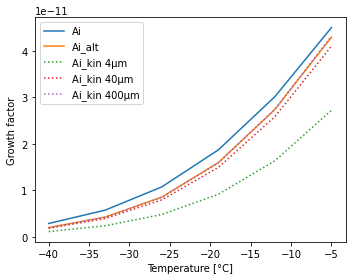

In [29]:
def growth_factor(f, r):
    
    delv = 1.3*8.e-8
    alpc = 0.036
    
    D = 0.211e-4*(f.T/273.15)**1.94*(101325./f.p)
    # modified diffusivity
    print(f.D, D)
    D_mod = D/(r/(r+delv)+D/(r*alpc)*np.sqrt(2.*np.pi/(af.Rv*f.T)))
    print(D_mod)
    
    delt = 2.16e-7
    alpt = 0.7
    ka = (5.69+0.017*(f.T-273.15))*1e-5*1e2*4.18684
    ka_mod = ka/(r/(r+delt)+ka/(r*alpt*f.rho_a*f.cp)*np.sqrt(2.*np.pi/(af.Ra*f.T)))
    print(f.k)
    print(ka)
    print(ka_mod)
    
    # why divide by 18e-3??
    #ls = lheat_sub(tmpk)/(18.d-3)

    Ai_diff = 1./(af.Rv*f.T/(f.e0*D_mod)+f.Li/(f.T*ka_mod)*(f.Li/(f.T*af.Rv)-1.))
    Ai_diff = 1.0/((af.rho_i*f.Li*f.Li/(ka_mod*af.Rv*f.T**2))+(af.rho_i*af.Rv*f.T/(f.Ei*D_mod)))
    Ai_diff = 1.0/((af.rho_i*af.Rv*f.T/(f.Ei*D_mod))+f.Li*af.rho_i/(f.T*ka_mod)*(f.Li/(f.T*af.Rv)-1.))
    
    return Ai_diff

Ts = np.arange(-40,0,7)

params = dict(Lw='RY', Li='RY', rho_w='HS', D='HP', Ei='GG', Ew='GG')
# params = dict()
f = af.get_factors(273.15+Ts, 1013.25e2, rh=100, **params)


fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(Ts, f.Ai, label='Ai')
ax.plot(Ts, f.Ai_alt, label='Ai_alt')
Ai_kin = growth_factor(f, 4e-6)
ax.plot(Ts, Ai_kin, ":", label='Ai_kin 4µm')
Ai_kin = growth_factor(f, 40e-6)
ax.plot(Ts, Ai_kin, ":", label='Ai_kin 40µm')
Ai_kin = growth_factor(f, 400e-6)
ax.plot(Ts, Ai_kin, ":", label='Ai_kin 400µm')


ax.legend()
ax.set_xlabel('Temperature [°C]')
ax.set_ylabel('Growth factor')

fig.tight_layout()
# fig.savefig('plots/saturation_pressure_parametrizations.png', dpi=250)